In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import cv2
import os

In [2]:
train=ImageDataGenerator(rescale=1/255)
valid=ImageDataGenerator(rescale=1/255)

In [3]:
train_dataset=train.flow_from_directory('Basedata/Training/',
                                        target_size=(200,200),
                                        batch_size=2,
                                        class_mode='categorical')
validation_dataset=valid.flow_from_directory('Basedata/Validation/',
                                        target_size=(200,200),
                                        batch_size=2,
                                        class_mode='categorical')

Found 834 images belonging to 4 classes.
Found 24 images belonging to 4 classes.


In [4]:
model=tf.keras.models.Sequential([tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(200,200,3)),
                                 tf.keras.layers.MaxPool2D(2,2),
                                 
                                 tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
                                 tf.keras.layers.MaxPool2D(2,2),
                                 
                                 tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                                 tf.keras.layers.MaxPool2D(2,2),
                                 
                                 tf.keras.layers.Flatten(),
                                 tf.keras.layers.Dense(128,activation='relu'),
                                 tf.keras.layers.Dense(4,activation='softmax')])

In [5]:
model.compile(loss='categorical_crossentropy',
             optimizer=RMSprop(learning_rate=0.001),
             metrics='accuracy')

In [7]:
model_fit=model.fit(train_dataset,
                    steps_per_epoch=2,
                    epochs=50,
                    validation_data=validation_dataset)

Epoch 1/50
2/2 [==============================] - 0s 383ms/step - loss: 0.1077 - accuracy: 1.0000 - val_loss: 0.7806 - val_accuracy: 0.6667
Epoch 2/50
2/2 [==============================] - 0s 375ms/step - loss: 0.1693 - accuracy: 1.0000 - val_loss: 0.8738 - val_accuracy: 0.6667
Epoch 3/50
2/2 [==============================] - 1s 508ms/step - loss: 0.8227 - accuracy: 0.7500 - val_loss: 0.7609 - val_accuracy: 0.7083
Epoch 4/50
2/2 [==============================] - 1s 423ms/step - loss: 0.3425 - accuracy: 0.7500 - val_loss: 0.8927 - val_accuracy: 0.6667
Epoch 5/50
2/2 [==============================] - 0s 366ms/step - loss: 0.2858 - accuracy: 0.7500 - val_loss: 0.8761 - val_accuracy: 0.6667
Epoch 6/50
2/2 [==============================] - 0s 362ms/step - loss: 0.4634 - accuracy: 0.7500 - val_loss: 0.7809 - val_accuracy: 0.7083
Epoch 7/50
2/2 [==============================] - 1s 445ms/step - loss: 0.2093 - accuracy: 1.0000 - val_loss: 0.8062 - val_accuracy: 0.6667
Epoch 8/50
2/2 [====

In [8]:
validation_dataset.class_indices

{'Apples': 0, 'Oranges': 1, 'Pomegranate': 2, 'Strawberries': 3}

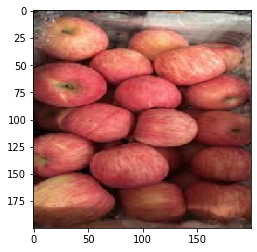

[[0. 0. 0. 1.]]


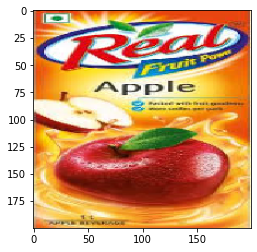

[[0. 1. 0. 0.]]


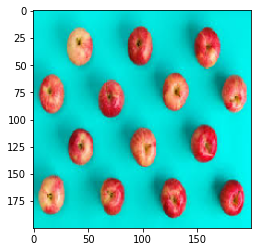

[[0. 0. 0. 1.]]


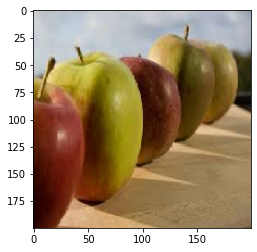

[[0. 1. 0. 0.]]


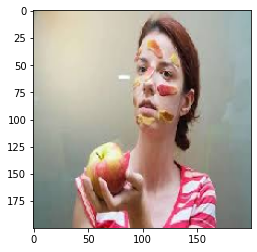

[[0. 0. 1. 0.]]


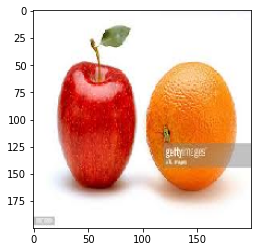

[[0. 1. 0. 0.]]


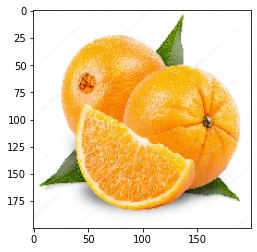

[[0. 1. 0. 0.]]


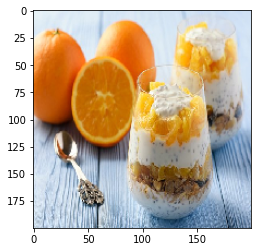

[[0. 1. 0. 0.]]


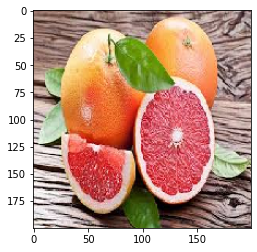

[[0. 1. 0. 0.]]


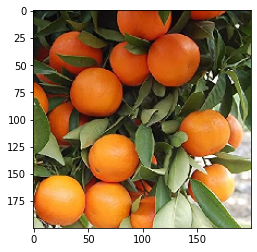

[[0. 1. 0. 0.]]


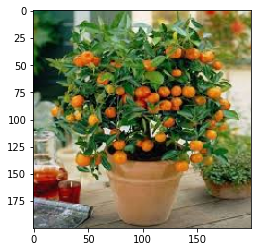

[[0. 1. 0. 0.]]


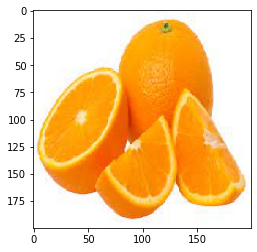

[[0. 1. 0. 0.]]


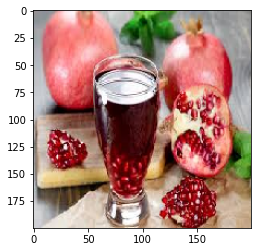

[[0.000000e+00 0.000000e+00 9.997110e-01 2.890327e-04]]


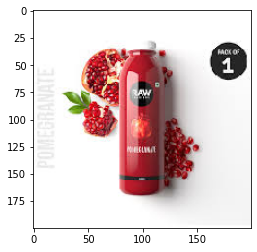

[[0. 0. 1. 0.]]


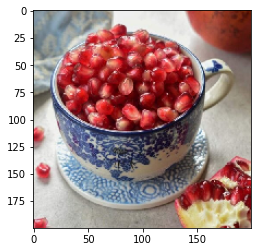

[[0. 0. 0. 1.]]


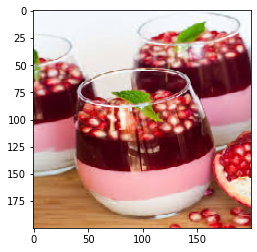

[[0. 0. 0. 1.]]


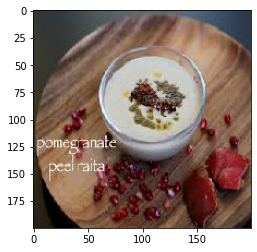

[[0. 0. 0. 1.]]


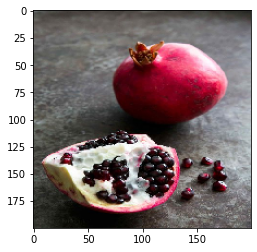

[[0.0000000e+00 0.0000000e+00 1.0000000e+00 1.6034206e-19]]


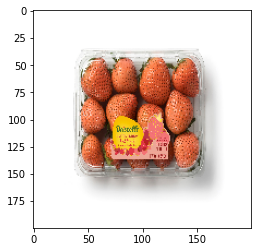

[[0. 1. 0. 0.]]


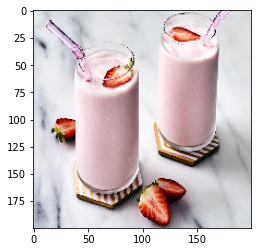

[[0. 0. 1. 0.]]


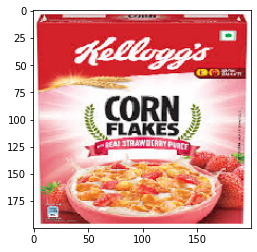

[[0. 0. 0. 1.]]


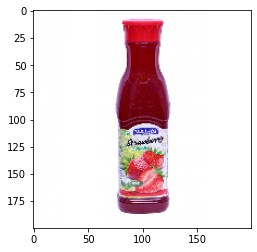

[[0. 0. 0. 1.]]


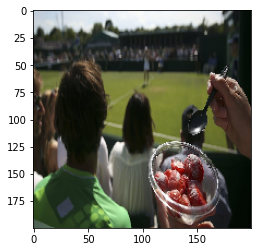

[[0. 0. 1. 0.]]


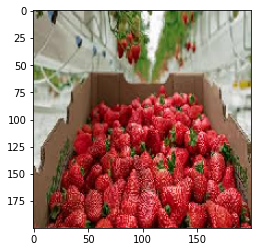

[[0. 0. 0. 1.]]


In [10]:
c=['Apple','Orange','Pomegranate','Strawberry']
dir_path='Basedata/Testing'
for i in os.listdir(dir_path):
    for j in range(1,7):
        img=image.load_img(dir_path+'/'+i+'/'+'img'+str(j)+'.jpg',target_size=(200,200))
        plt.imshow(img)
        plt.show()
        
        x=image.img_to_array(img)
        x=np.expand_dims(x,axis=0)
        images=np.vstack([x])
        val=model.predict(images)
        if c[0][0]==1:
            print("It's an Apple")
        elif c[0][1]==1:
            print("It's an Orange")
        elif c[0][2]==1:
            print("It's a Pomegranate")
        else:
            print("It's a Strawberry")